# Modeling prior predictive distribution

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 1. 
# 2.
# 3.
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /home/lab_2/code_1.stan to exe file /home/lab_2/code_1
INFO:cmdstanpy:compiled model executable: /home/lab_2/code_1


In [17]:
# 4.
# 5.
samples = gen_quant.sample(data={"N":50}, fixed_param=True, iter_sampling=1000, iter_warmup=0, chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [18]:
df = samples.draws_pd()
df

,lp__,accept_stat__,y,p
0,0.0,0.0,10.0,0.225105
1,0.0,0.0,6.0,0.163251
2,0.0,0.0,20.0,0.225834
3,0.0,0.0,5.0,0.125737
4,0.0,0.0,6.0,0.132213
...,...,...,...,...
995,0.0,0.0,8.0,0.246433
996,0.0,0.0,11.0,0.211805
997,0.0,0.0,16.0,0.264975
998,0.0,0.0,10.0,0.183630


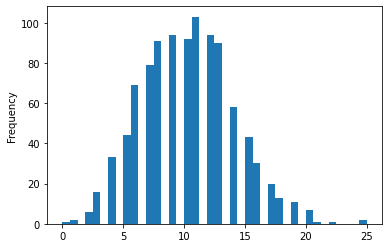

In [27]:
df['y'].plot.hist(bins=40)
plt.show()

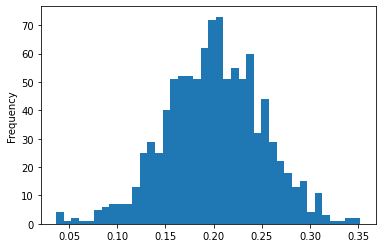

In [21]:
df['p'].plot.hist(bins=40)
plt.show()


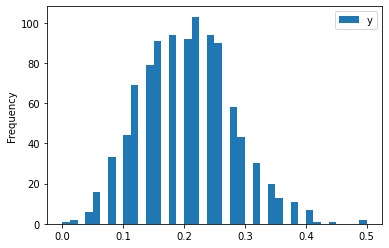

In [24]:
# 6.
ratio = pd.DataFrame(df['y'] / 50)
ratio.plot.hist(bins=40)
plt.show()

In [25]:
# 7.
ratio.mean()

y    0.20518
dtype: float64

Mean of the ratio is consistent with prior knowledge because it indicates that an allergic reaction occurs in about 20% of cases
<br> <br>